In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [24]:
files = glob.glob('/home/pmcroot/data1/2016-08-05_take3small/exposure_32*.npz')
files.sort()

In [8]:
import sys

In [25]:
x,y = (256, 256)
stamps = np.empty((len(files),256,256),dtype='uint16')
focus = []
for k,fn in enumerate(files):
    print k,
    sys.stdout.flush()
    fs = np.load(fn)
    focus.append(fs['state'][()]['fpos'])
    stamps[k,:,:] = fs['image'][x-128:x+128,y-128:y+128]
focus = np.array(focus)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79


In [15]:
d = 0.0
for fn in (files):
    fs = np.load(fn)
    d += fs['image'].astype('float')

In [24]:
d = np.load(files[28])['image']

In [16]:
import scipy.ndimage

<IPython.core.display.Javascript object>


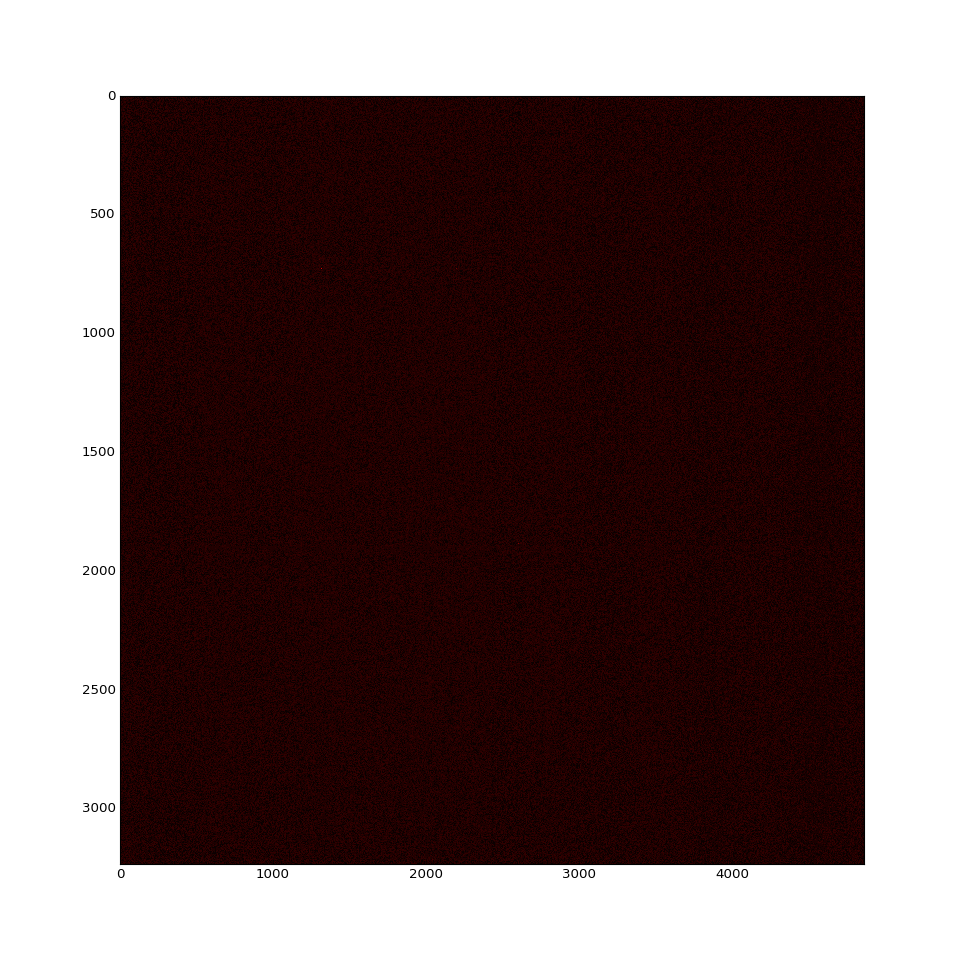

In [28]:
figure(figsize=(12,12))
#imshow(scipy.ndimage.gaussian_filter(d,2),aspect='auto',cmap=cm.hot,interpolation='nearest')
imshow(d,aspect='auto',cmap=cm.hot,interpolation='nearest')

In [34]:
stamps.shape

(200, 128, 128)

<IPython.core.display.Javascript object>


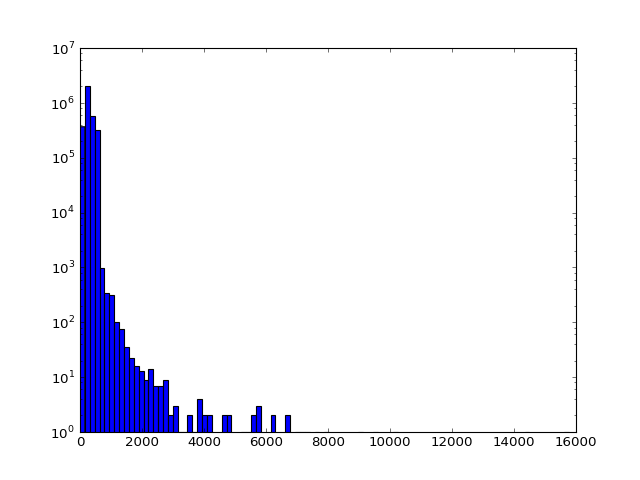

In [42]:
figure()
_ = hist(stamps.flatten(),bins=100,log=True)

<IPython.core.display.Javascript object>


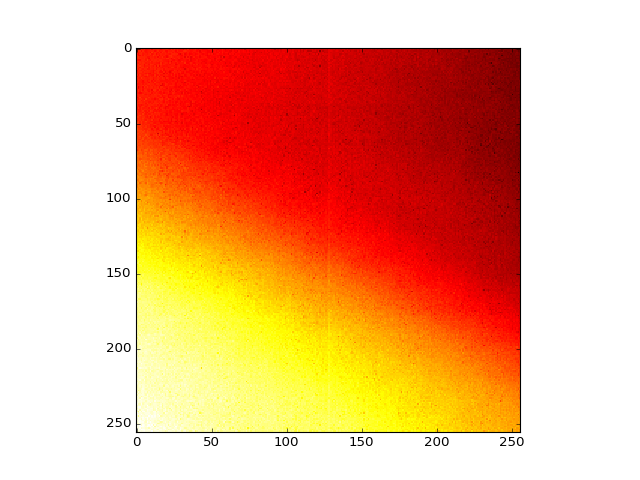

In [26]:
figure()
imshow((stamps.mean(0)),cmap=cm.hot,interpolation='nearest')

<IPython.core.display.Javascript object>


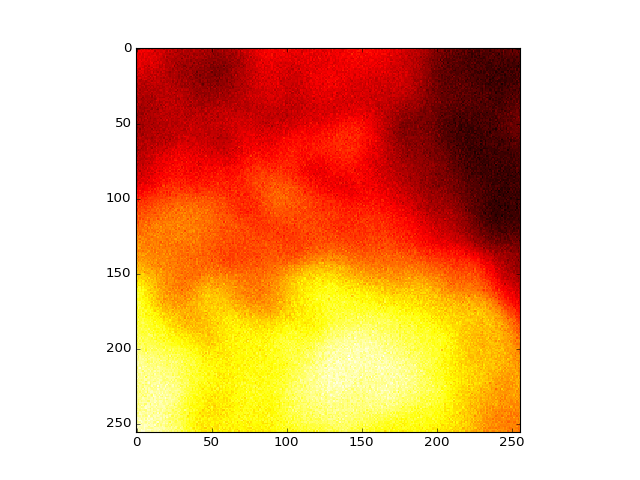

In [27]:
figure()
imshow((stamps[29,:,:]),cmap=cm.hot,interpolation='nearest')

In [55]:
def est_flux(d,half_width=4):
    x0 = d.shape[0]//2
    y0 = d.shape[0]//2
    on = d[x0-half_width:x0+half_width,y0-half_width:y0+half_width].sum(dtype='float')
    x0 = x0 + 2*half_width
    y0 = y0 + 2*half_width
    off = d[x0-half_width:x0+half_width,y0-half_width:y0+half_width].sum(dtype='float')
    return on-off

In [56]:
est_flux(stamps[27,:,:])

19136.0

<IPython.core.display.Javascript object>


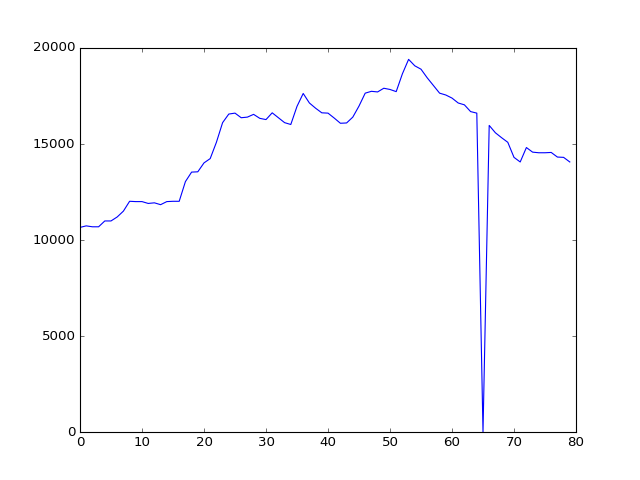

In [28]:
figure()
plot(stamps.max(1).max(1))

In [9]:
import scipy.ndimage

In [13]:
from skimage.restoration import denoise_bilateral

In [16]:
def contrast(im):
    im = denoise_bilateral(im.astype('float'),multichannel=False)
    #im = im.astype('float')
    return (np.abs(im[1:-1,1:-1]-im[0:-2,1:-1]) + np.abs(im[1:-1,1:-1]-im[2:,1:-1]) +
            np.abs(im[1:-1,1:-1]-im[1:-1,0:-2]) + np.abs(im[1:-1,1:-1]-im[1:-1,2:]))

In [17]:
contrasts = np.array([contrast(im) for im in stamps])

ValueError: The maximum value found in the image was 0.

In [12]:
contrasts.shape

(80, 254, 254)

In [18]:
figure()
plot(np.std(np.std(contrasts**2,1),1)/(contrasts**2).mean(1).mean(1))

<IPython.core.display.Javascript object>

NameError: name 'contrasts' is not defined

<IPython.core.display.Javascript object>


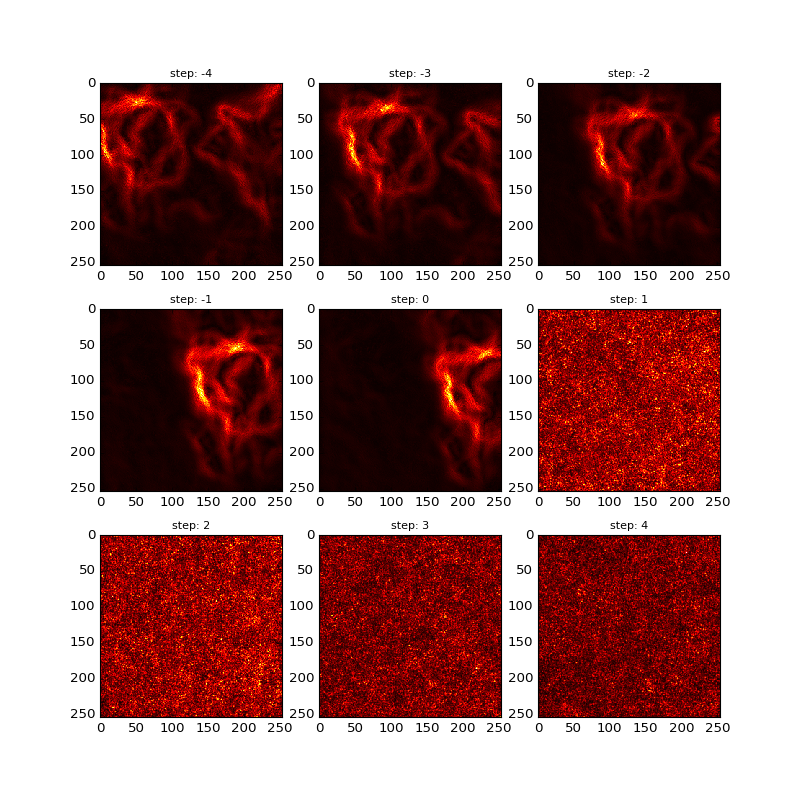

In [36]:
fig,axs = subplots(3,3,figsize=(10,10))
axs = axs.flatten()
for ax,offset in zip(axs,range(-4,5)):
    im = ax.imshow(contrasts[44+offset],#,128-32:128+32,128-32:128+32],
                   cmap=cm.hot,interpolation='nearest')
    #im.set_clim(0,400*16)
    ax.set_title('step: %d' % offset, size='small')# flux=%.1f' % (offset,est_flux(stamps[27+offset,:,:])/16.),size='small')

<IPython.core.display.Javascript object>


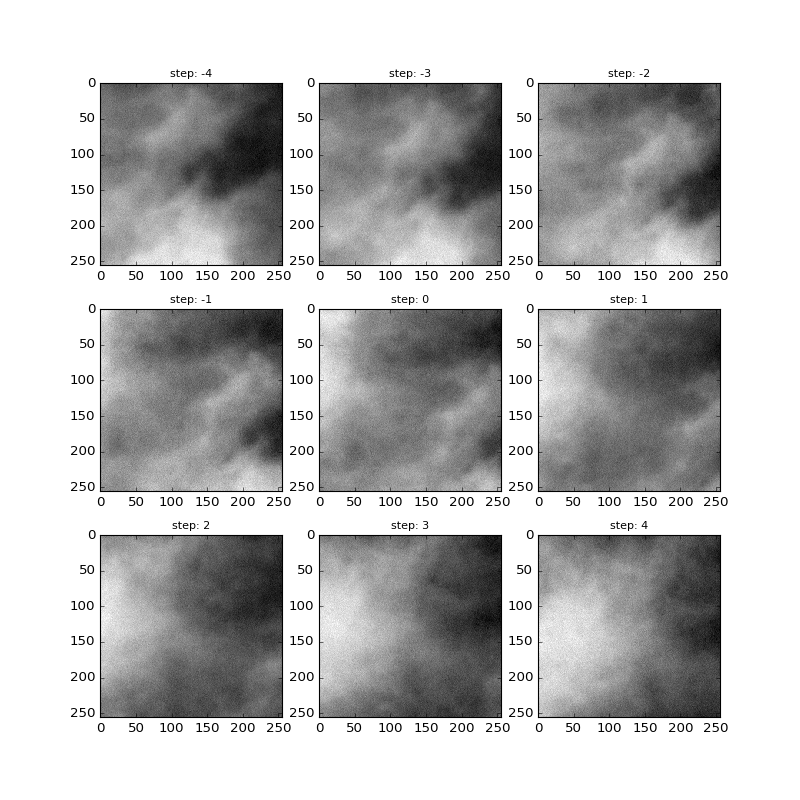

In [29]:
fig,axs = subplots(3,3,figsize=(10,10))
axs = axs.flatten()
for ax,offset in zip(axs,range(-4,5)):
    im = ax.imshow(stamps[44+offset],#,128-32:128+32,128-32:128+32],
                   cmap=cm.gray,interpolation='nearest')
    #im.set_clim(0,400*16)
    ax.set_title('step: %d' % offset, size='small')# flux=%.1f' % (offset,est_flux(stamps[27+offset,:,:])/16.),size='small')

In [45]:
rcParams['font.size'] = 18

<IPython.core.display.Javascript object>


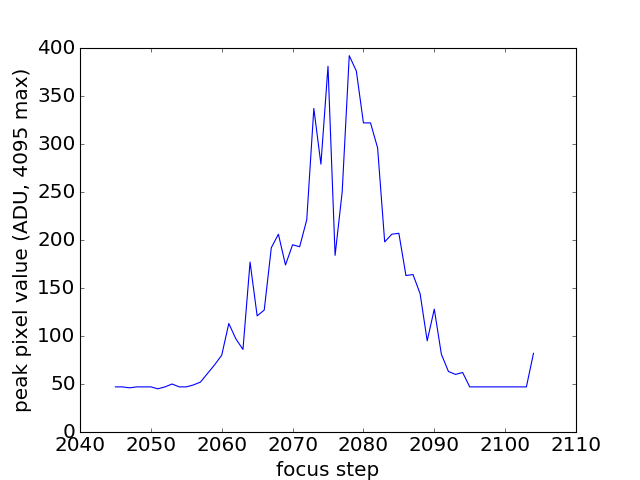

In [46]:
figure()
_ = plot(focus,stamps[:,:,:].max(1).max(1)/16.)
ylabel('peak pixel value (ADU, 4095 max)')
xlabel('focus step')

In [8]:
fs = np.load('/home/pmcroot/data1/2016-08-04/focus_step_0100.npz')

In [9]:
fs.keys()

['image', 'state']

In [10]:
fs['state']

array({'fmax': 2143, 'appos': 0, 'fpos': 2043, 'exposure_counts': 65000, 'apmin': 0, 'fmin': 18, 'time': 1470363272.123983, 'apmax': 31}, dtype=object)

In [61]:
d.shape

(3232, 4864)

<IPython.core.display.Javascript object>


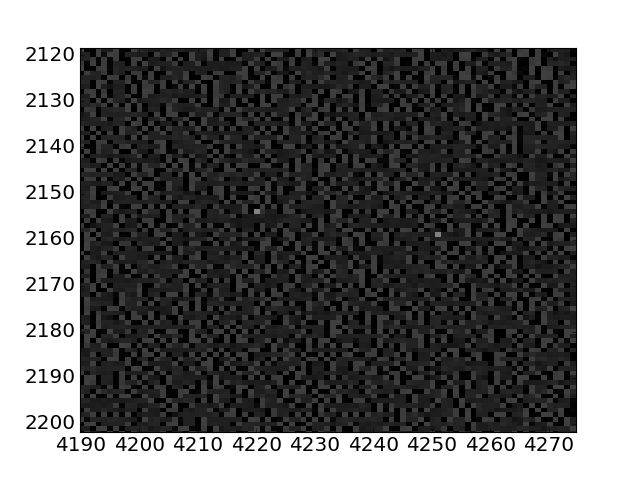

In [71]:
figure()
imshow(d,cmap=cm.gray,interpolation='nearest',aspect='auto')
clim(0,2000)

<IPython.core.display.Javascript object>


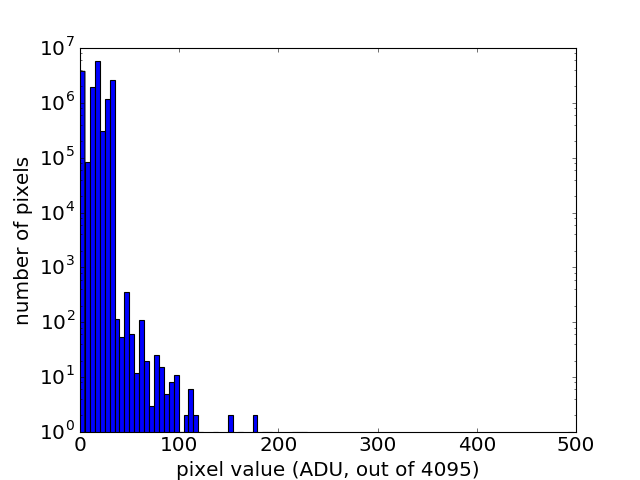

In [72]:
figure()
_=hist(d.flatten()/16.0,bins=100,log=True)
ylabel('number of pixels')
xlabel('pixel value (ADU, out of 4095)')

In [11]:
im = fs['image']

In [29]:
im = d

In [30]:
ff = np.abs(np.fft.rfft(im*np.hamming(im.shape[0])[:,None],axis=0))

<IPython.core.display.Javascript object>


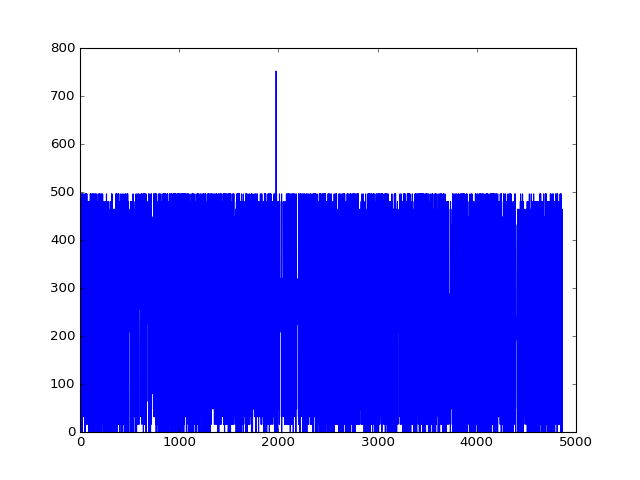

In [40]:
figure()
#plot(ff[400:800,:].mean(0))
plot(d[1134,:])#3260])

In [16]:
ff.shape

(1617, 4864)

In [22]:
import scipy.ndimage

<IPython.core.display.Javascript object>


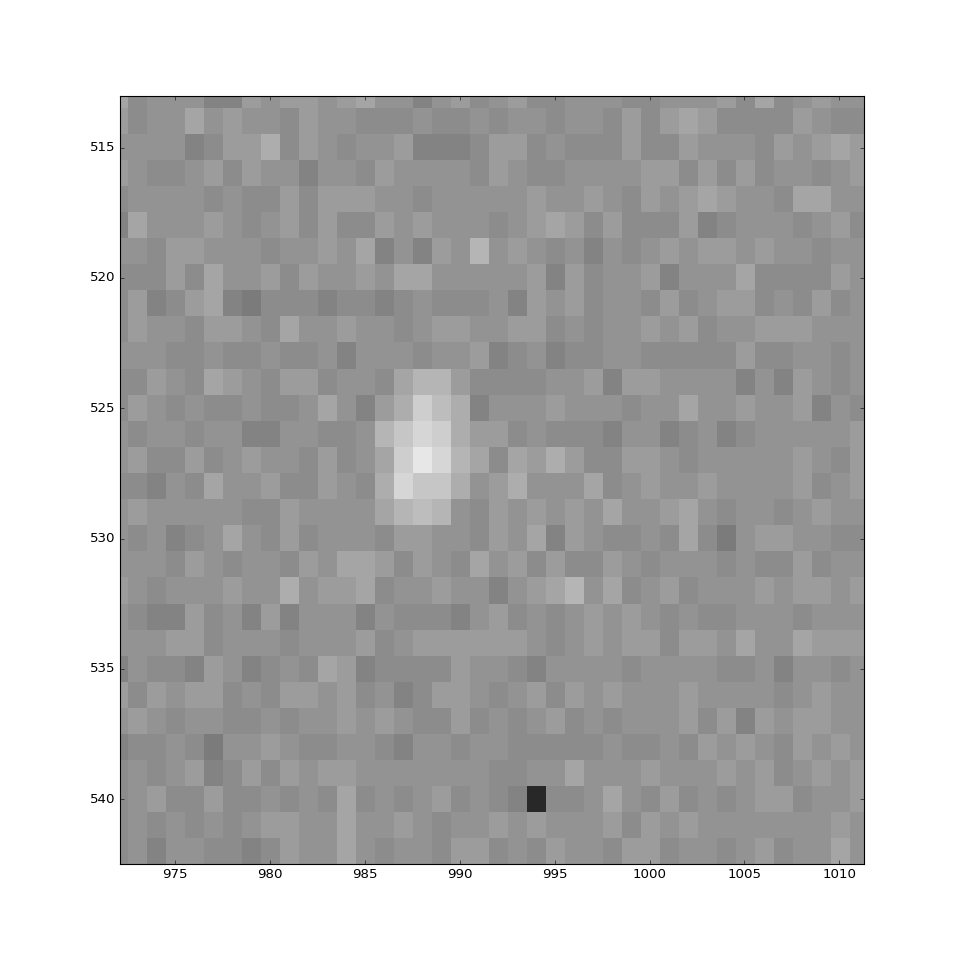

In [23]:
figure(figsize=(12,12))
imshow(scipy.ndimage.median_filter(im,3)[::4,::4],cmap=cm.gray,interpolation='nearest',aspect='auto')

In [12]:
im.shape

(3232, 4864)

In [26]:
527*4,988*4

(2108, 3952)

<IPython.core.display.Javascript object>


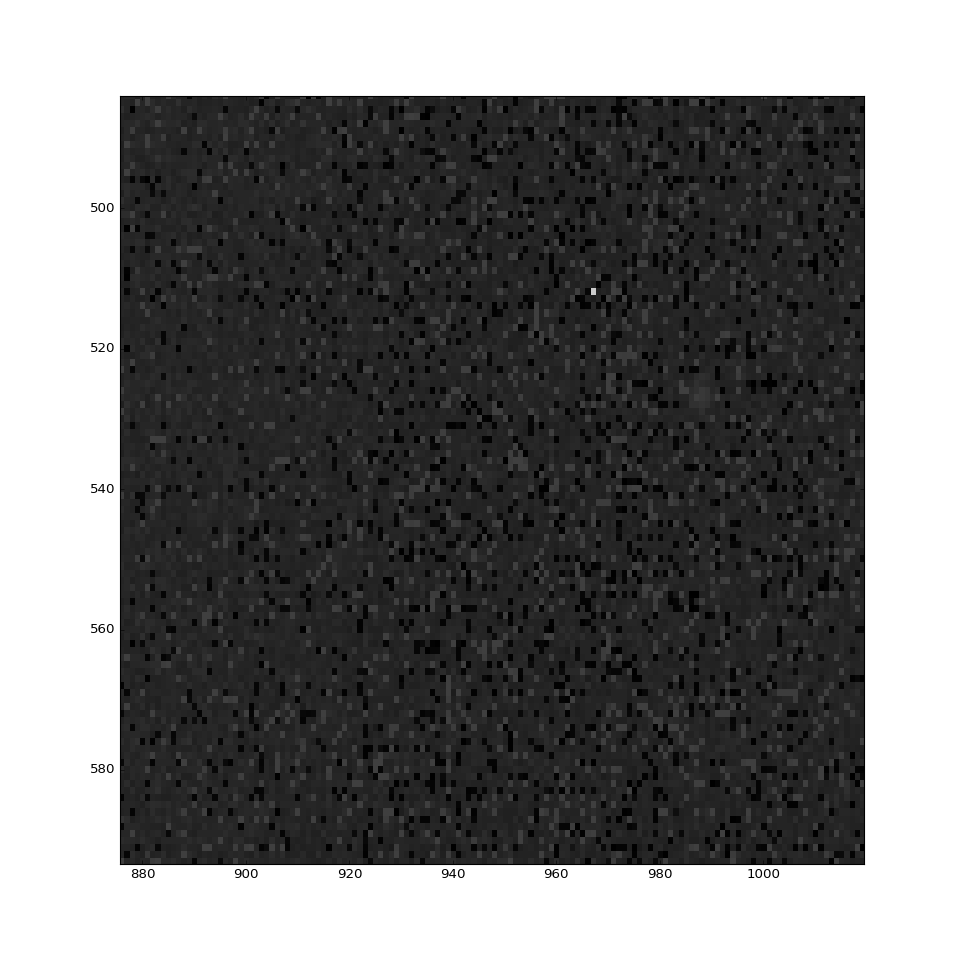

In [25]:
figure(figsize=(12,12))
imshow(im[::4,::4],cmap=cm.gray,interpolation='nearest',aspect='auto')
clim(0,2000)